**Exctracing data from Kaggle**

In [1]:
#Installing the Kaggle library
!pip install Kaggle

In [2]:
! pip install -q kaggle  #### really don't know this line of code work for me

In [3]:
from google.colab import drive     # with this command the file is uploaded on gdrive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!cp /content/gdrive/MyDrive/Practice_Projects/kaggle.json ~/.kaggle/kaggle.json  # Avoid spaces when giving name to files

Importing dataset from Kaggle

In [5]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats    # you will get this command on specific dataset by clicking copy API command..

100% 809M/812M [00:08<00:00, 72.7MB/s]
100% 812M/812M [00:08<00:00, 105MB/s] 


In [6]:
!ls   # this line of code print list of files which are in zip fromat

dogs-vs-cats.zip  gdrive  sample_data


#Exctacting the compressed file

In [7]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')   # just copy the zip file name from above line of code or copy the path of file from zip file

The dataset is extracted


In [8]:
#Exctracting the data from train zip frile
#i need to give a path of train file
from zipfile import ZipFile

dataset = '/content/train.zip'   #only change id here i need to give a path of train.zip file


with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')   # train file is in list now

The dataset is extracted


In [9]:
import os
# counting the number of files in train folder
path, dir,files=next(os.walk('/content/train')) # copy the path of train file
file_count = len(files)  # i am getting here count of the image file but without print it is not clear how much is len
print('Number of Images:',file_count)

Number of Images: 25000


In [10]:
#printing the name of images
file_names= os.listdir('/content/train')
print(file_names)


['cat.2409.jpg', 'dog.740.jpg', 'dog.4890.jpg', 'dog.3503.jpg', 'dog.5186.jpg', 'dog.6744.jpg', 'cat.12140.jpg', 'cat.4386.jpg', 'dog.4587.jpg', 'dog.7239.jpg', 'cat.3696.jpg', 'cat.8299.jpg', 'cat.11016.jpg', 'dog.1082.jpg', 'dog.2993.jpg', 'dog.1371.jpg', 'dog.3888.jpg', 'dog.4805.jpg', 'dog.10488.jpg', 'cat.525.jpg', 'dog.6793.jpg', 'cat.2479.jpg', 'cat.10853.jpg', 'dog.9219.jpg', 'cat.11669.jpg', 'dog.6389.jpg', 'cat.6067.jpg', 'dog.1812.jpg', 'dog.2743.jpg', 'dog.8080.jpg', 'dog.2896.jpg', 'dog.9172.jpg', 'cat.4383.jpg', 'cat.6344.jpg', 'cat.11345.jpg', 'cat.5721.jpg', 'cat.3997.jpg', 'cat.3268.jpg', 'dog.6821.jpg', 'cat.9574.jpg', 'dog.602.jpg', 'dog.3025.jpg', 'dog.12410.jpg', 'cat.852.jpg', 'dog.9942.jpg', 'dog.319.jpg', 'cat.9826.jpg', 'cat.7758.jpg', 'dog.4792.jpg', 'cat.6668.jpg', 'dog.7351.jpg', 'cat.5136.jpg', 'cat.2784.jpg', 'cat.10979.jpg', 'dog.6448.jpg', 'cat.1357.jpg', 'cat.8620.jpg', 'dog.9663.jpg', 'cat.2865.jpg', 'dog.7236.jpg', 'cat.10694.jpg', 'cat.1826.jpg', 'do

Importing regular file which are dependencies

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow  # cv2 is open source and imshow is fumction in cv2 to display the images

Displaying the images


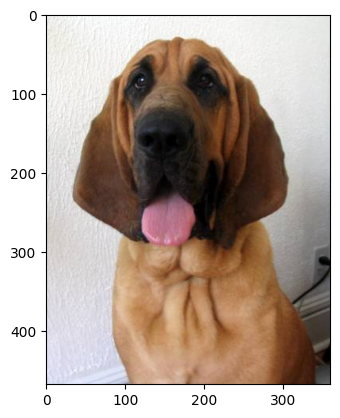

In [12]:
#Display the first image
img=mpimg.imread('/content/train/dog.8384.jpg')
imgplt = plt.imshow(img)
plt.show()

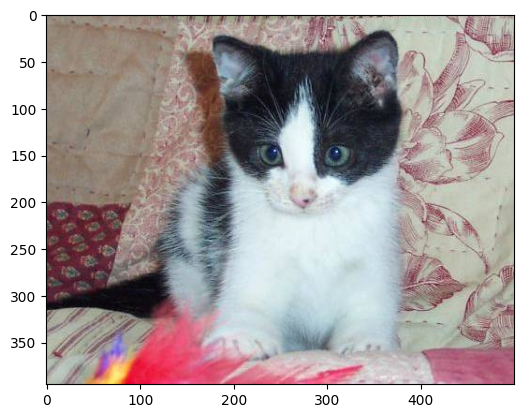

In [13]:
#Displaying the 2 image
img = mpimg.imread('/content/train/cat.2409.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
file_names= os.listdir('/content/train')

for i in range(5):
   print(file_names[i])   # in o/p  cat.2409.jpg means content string value

cat.2409.jpg
dog.740.jpg
dog.4890.jpg
dog.3503.jpg
dog.5186.jpg


In [20]:
file_names = os.listdir('/content/train')   # this line of code is just to get rid of string value

for i in range(5):

  name = file_names[i]
  print(name[0:3])   # 0:3 judt to get first 3 digit if i write 0:5 in the o/p i get .3 or .2


cat
dog
dog
dog
dog


In [23]:
file_names = os.listdir('/content/train')  # to count the dog and cat images
#making counter dor dog and cat
dog_count=0
cat_count=0

for img_file in file_names:
  name = img_file[0:3]   # every time count only 3 digits
  if name == 'dog':
      dog_count +=1
  else:
      cat_count+=1

print ('Number of dog images: ',dog_count)
print ('Number of cat images: ',cat_count)

Number of dog images:  12500
Number of cat images:  12500


# New Section

Both of the picture are of different size I must convert all image into same size.Converting all images into one size.

In [25]:
#creating new directory for resized images
os.mkdir('/content/image_resized') # mkdir make directory basic dos command

In [26]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

#making a for loop to iterrage data for only first 2000 images

for i in range(2000):   # for loop iterrate 2000 times

  filename = os.listdir(original_folder)[i]  # make a list of all folder
  img_path = original_folder + filename  # to take a path from origianl folder and saving it in img_path concatinating both to make img_path

  img = Image.open(img_path)  #from PIL libary open the image and take the path
  img = img.resize((224, 224))  # mibilenet exceptimages  (224,224) 224 is nothing but a vertical and horizontal pixel
  img = img.convert('RGB')

  newImgPath =resized_folder + filename
  img.save(newImgPath)

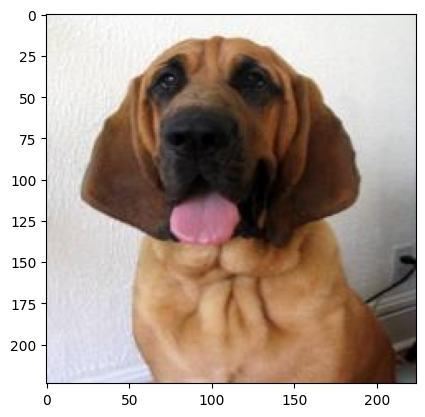

In [30]:
#checking the resizing done or not
#Re-Display the first image
img=mpimg.imread('/content/image_resized/dog.8384.jpg')   # just change the path
imgplt = plt.imshow(img)
plt.show()   # perfect work

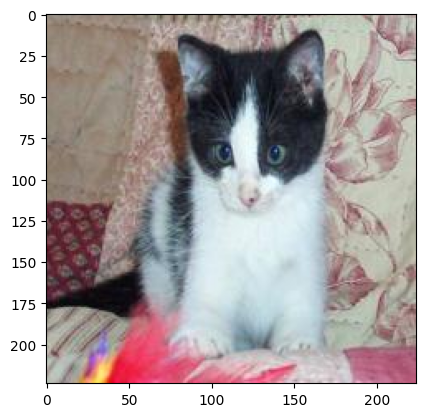

In [31]:
#Displaying the 2 image
img = mpimg.imread('/content/image_resized/cat.2409.jpg')
imgplt = plt.imshow(img)
plt.show() # resizing done

**Creating label**

In [38]:
#creating a for loop to assign label
filenames = os.listdir('/content/image_resized')

labels=[]

for i in range (2000):

  file_name = filenames[i]
  label = file_name[0:3]  # to check first 3 digit

  if label == 'cat':
     labels.append(0)

  else:
    labels.append(1)

In [39]:
print(filenames[0:5])  # to get 3 digit and number [0:5]
print(len(filenames))

['cat.2409.jpg', 'dog.740.jpg', 'dog.4890.jpg', 'dog.3503.jpg', 'dog.5186.jpg']
2000


In [40]:
print(labels[0:5])
print(len(labels))  # labeling is done

[0, 1, 1, 1, 1]
2000


In [41]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)  # here unique is labels
print(values)
print(counts)

[0 1]
[1001  999]


Converting resized images to numpy

In [42]:
import cv2  # open source library
import glob

In [43]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])  # converting into numpy array

In [44]:
print(dog_cat_images)

[[[[131 139 146]
   [135 143 150]
   [139 147 154]
   ...
   [163 166 181]
   [183 184 204]
   [195 196 216]]

  [[136 143 152]
   [131 141 148]
   [132 139 148]
   ...
   [148 151 165]
   [158 160 178]
   [163 165 183]]

  [[137 146 156]
   [128 139 147]
   [122 131 141]
   ...
   [159 164 173]
   [166 169 183]
   [166 169 183]]

  ...

  [[180 190 184]
   [179 189 183]
   [180 189 186]
   ...
   [124  93 186]
   [126  95 188]
   [126  95 188]]

  [[183 194 186]
   [181 192 184]
   [179 189 183]
   ...
   [125  94 187]
   [126  94 189]
   [127  95 190]]

  [[181 192 182]
   [181 192 182]
   [181 191 185]
   ...
   [125  94 187]
   [125  93 188]
   [124  92 187]]]


 [[[ 86  75  77]
   [ 87  76  78]
   [ 87  79  80]
   ...
   [ 54  98  67]
   [ 56  99  66]
   [ 65 108  75]]

  [[ 84  71  73]
   [ 84  73  75]
   [ 88  77  79]
   ...
   [118 159 128]
   [111 152 121]
   [112 153 122]]

  [[ 89  75  76]
   [ 90  78  78]
   [ 93  81  81]
   ...
   [113 145 120]
   [105 137 112]
   [107 140

In [45]:
type(dog_cat_images)

numpy.ndarray

In [46]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [47]:
X = dog_cat_images  # X will have all images of dogs and cat
Y = np.asarray(labels)  # Y will have corresponding labels

**Train Test Split**

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


Total shape =2000 of 224,224 pixel and 3 is RGB
X_train shape = 1600 i.e.training images
X_test shape =400 i.e. tesing image

In [50]:
#sclaing the data
X_train_scaled= X_train/225   # to convert data in range 0 to 1 diving by 225

X_test_scaled = X_test/255

In [51]:
print(X_train_scaled)

[[[[0.18222222 0.24       0.30222222]
   [0.12888889 0.18666667 0.24888889]
   [0.08888889 0.14222222 0.22222222]
   ...
   [0.49777778 0.53777778 0.6       ]
   [0.48444444 0.52444444 0.58666667]
   [0.45333333 0.49333333 0.55555556]]

  [[0.16       0.21777778 0.28      ]
   [0.13333333 0.2        0.27111111]
   [0.11555556 0.16888889 0.24888889]
   ...
   [0.43555556 0.47555556 0.53777778]
   [0.46666667 0.50666667 0.56888889]
   [0.48444444 0.52444444 0.58666667]]

  [[0.11555556 0.18222222 0.25333333]
   [0.12888889 0.2        0.27111111]
   [0.12       0.18222222 0.26222222]
   ...
   [0.48444444 0.52444444 0.58666667]
   [0.47111111 0.51111111 0.57333333]
   [0.43111111 0.47111111 0.53333333]]

  ...

  [[0.44       0.45333333 0.52      ]
   [0.45777778 0.47111111 0.53777778]
   [0.53777778 0.55111111 0.61777778]
   ...
   [0.62666667 0.61333333 0.68      ]
   [0.48444444 0.47111111 0.53777778]
   [0.46666667 0.45333333 0.52      ]]

  [[0.28444444 0.29777778 0.36444444]
   [0.3

**Building the Nueral Network**

In [52]:
import tensorflow as tf
import tensorflow_hub as hub

In [53]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [54]:
num_of_classes = 2  # number of images we have

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [55]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [56]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 79s 1s/step - loss: 0.2067 - acc: 0.9187
Epoch 2/5
50/50 [==============================] - 64s 1s/step - loss: 0.0743 - acc: 0.9731
Epoch 3/5
50/50 [==============================] - 66s 1s/step - loss: 0.0511 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0403 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 58s 1s/step - loss: 0.0325 - acc: 0.9956


In [57]:
score, acc = model.evaluate(X_test_scaled, Y_test)  # checking test accuracy
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0563 - acc: 0.9725
Test Loss = 0.056312445551157
Test Accuracy = 0.9725000262260437


Predictive system
**bold text**

In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])  # 1 is inputting 1 picture

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Output hidden; open in https://colab.research.google.com to view.

In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])  # 1 is inputting 1 picture

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Output hidden; open in https://colab.research.google.com to view.